<ipython-input-16-98e6fb932212>:41: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  df = pd.read_csv(file_path, header=0, parse_dates=[0], index_col=0, squeeze=True)


Epoch 1/200
1071/1071 [==============================] - 4s 2ms/step - loss: 9.9657e-04
Epoch 2/200
1071/1071 [==============================] - 2s 2ms/step - loss: 9.8446e-04
Epoch 3/200
1071/1071 [==============================] - 3s 3ms/step - loss: 9.7619e-04
Epoch 4/200
1071/1071 [==============================] - 3s 2ms/step - loss: 9.5621e-04
Epoch 5/200
1071/1071 [==============================] - 3s 2ms/step - loss: 9.2557e-04
Epoch 6/200
1071/1071 [==============================] - 3s 3ms/step - loss: 9.1349e-04
Epoch 7/200
1071/1071 [==============================] - 3s 3ms/step - loss: 9.0747e-04
Epoch 8/200
1071/1071 [==============================] - 3s 2ms/step - loss: 8.9797e-04
Epoch 9/200
1071/1071 [==============================] - 3s 2ms/step - loss: 8.8411e-04
Epoch 10/200
1071/1071 [==============================] - 3s 3ms/step - loss: 8.6649e-04
Epoch 11/200
1071/1071 [==============================] - 3s 3ms/step - loss: 8.4564e-04
Epoch 12/200
1071/1071 [======

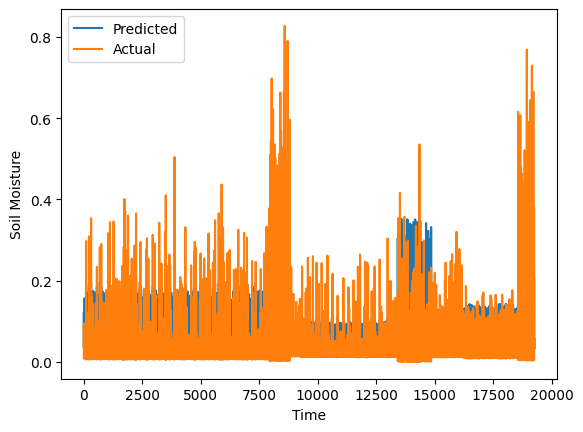

In [16]:
import pandas as pd
import tensorflow as tf
from math import sqrt
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt
# Function to create LSTM model
def Lstmcreate_model(input_shape):
    model = Sequential()
    model.add(LSTM(50, input_shape=input_shape))
    model.add(Dense(1))
    model.compile(loss='mse', optimizer='adam')
    return model
# Function to train LSTM model
def Lstmtrain_model(model, train_X, train_y, epochs):
    history = model.fit(train_X, train_y, epochs=epochs, batch_size=72, verbose=1, shuffle=False)
    return model
# Function to test LSTM model
def Lstmtest_model(model, test_X, test_y):
    y_pred = model.predict(test_X)
    rmse = sqrt(mean_squared_error(test_y, y_pred))
    return rmse, y_pred
# Function to create time series datasets
def create_dataset(data, time_steps=1):
    X, Y = [], []
    for i in range(len(data)-time_steps):
        X.append(data[i:i+time_steps])
        Y.append(data[i+time_steps])
    return np.array(X), np.array(Y)
# Function to load and preprocess data
def load_data(file_path):
    # Load time series dataset
    df = pd.read_csv(file_path, header=0, parse_dates=[0], index_col=0, squeeze=True)
    # Split dataset into train and test sets
    train_size = int(len(df) * 0.8)
    train, test = df[0:train_size], df[train_size:len(df)]
    # Normalize data
    scaler = MinMaxScaler()
    train = scaler.fit_transform(train.values.reshape(-1,1))
    test = scaler.transform(test.values.reshape(-1,1))
    # Create time series datasets
    x_train, y_train = create_dataset(train, time_steps=1)
    x_test, y_test = create_dataset(test, time_steps=1)
    return x_train, y_train, x_test, y_test, scaler
# Load and preprocess data
file_path = '/content/soil_data.csv'
x_train, y_train, x_test, y_test, scaler = load_data(file_path)
# Creating LSTM model
input_shape = (x_train.shape[1], x_train.shape[2])
model = Lstmcreate_model(input_shape)
model = Lstmtrain_model(model, x_train, y_train, epochs=200)
rmse, y_pred = Lstmtest_model(model, x_test, y_test)
print("Testing loss for time series model on soil data is:", rmse)
# Load and preprocess new data
new_data = pd.read_csv('/content/soil_data.csv')
new_data = scaler.transform(new_data.values.reshape(-1, 1))
new_data = np.reshape(new_data, (1, new_data.shape[0], 1))
# Make predictions using the trained model
prediction = model.predict(new_data)
# Inverse transform the predicted value to get the original scale
prediction = scaler.inverse_transform(prediction)
print("The predicted Soil moisture value is:", prediction)
# Plot actual vs predicted values
plt.plot(y_pred, label='Predicted')
plt.plot(y_test, label='Actual')
plt.xlabel('Time')
plt.ylabel('Soil Moisture')
plt.legend()
plt.show()

